In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_orig = pd.read_csv("../input/mice-protein-expression/Data_Cortex_Nuclear.csv")
df = df_orig.copy()

In [4]:
df_orig.to_csv("mice_protein_expression.csv", index=False)

In [18]:
df_orig.shape

(1080, 82)

## Original Data

- Number of samples = 1080
- Number of proteins = 77

In [19]:
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [20]:
df.loc[:, "class"].value_counts()

c-CS-m    150
c-SC-m    150
c-CS-s    135
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-SC-s    135
t-CS-s    105
Name: class, dtype: int64

## Extraction of matrix

In [21]:
matrix = df.iloc[:, 1:-4]
matrix.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730


In [22]:
missing_values = pd.DataFrame({"sample": matrix.index, "Number of missing values": matrix.T.isna().sum()})
missing_values.to_csv("missing_values.csv", index=False)

## Dealing with missing values - Sample level

Sample number 987, 988, 989 have 43 missing protein measurements
We will remove these

In [23]:
df.loc[987:989]

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
987,3426_13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.112854,0.405540,0.151693,0.163125,0.208852,1.443353,Ts65Dn,Saline,S/C,t-SC-s
988,3426_14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.120664,0.422986,0.175044,0.185038,0.195326,1.443269,Ts65Dn,Saline,S/C,t-SC-s
989,3426_15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.098278,0.427405,0.172209,0.200861,0.233076,1.495249,Ts65Dn,Saline,S/C,t-SC-s


In [24]:
df.drop([987, 988, 989], axis=0, inplace=True)

## Dealing with missing values: Protein level

In [25]:
missing_values_proteins = pd.DataFrame({"protein": matrix.T.index, "Number of samples protein missing from": matrix.isna().sum()})
missing_values_proteins.to_csv("missing_values_proteins.csv", index=False)

Removing these proteins because they are missing from too many samples

* BAD_N	213
* BCL2_N	285
* pCFOS_N	75
* H3AcK18_N	180
* EGR1_N	210
* H3MeK4_N	270

In [26]:
df.drop(["BAD_N", "BCL2_N", "pCFOS_N", "H3AcK18_N", "EGR1_N", "H3MeK4_N"], axis=1, inplace=True)

## Extract the matrix for quality check plottings

In [28]:
matrix = df.iloc[:, 1:-4]
print(matrix.shape)
matrix.head()

(1077, 71)


,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.106305,0.427099,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.106592,0.441581,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.108303,0.435777,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.103184,0.391691,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.251773,1.534835,2.009109,0.119524,0.997775,0.878668,0.205604,0.104784,0.434154,1.839730


## Impute missing values

We will impute missing values with average expression level of protein across all the samples

- There are better ways to do this by using regression imputation
- We want to do it quickly since this part is not the focus of this exercise

In [55]:
for i in matrix.columns:
    matrix[i].fillna(matrix[i].mean(), inplace=True)

In [58]:
div = matrix.mean(axis=1)

In [62]:
# matrix2 = matrix.apply(lambda x: x/div, axis=0)
# matrix2.head()

In [73]:
matrix_log = matrix.apply(np.log)

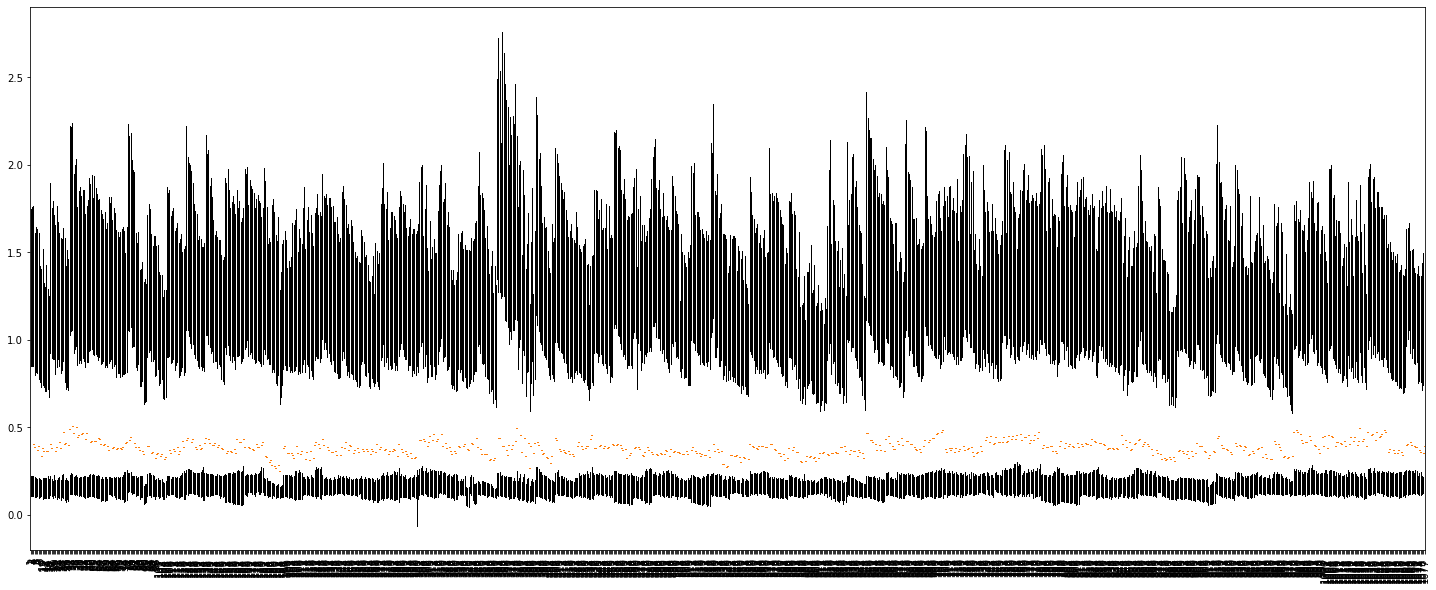

In [72]:
plt.figure(figsize=(25, 10))
plt.boxplot(matrix.T, showcaps=False, meanline=False, showbox=False, showfliers=False)
plt.xticks(rotation=90)
plt.show()

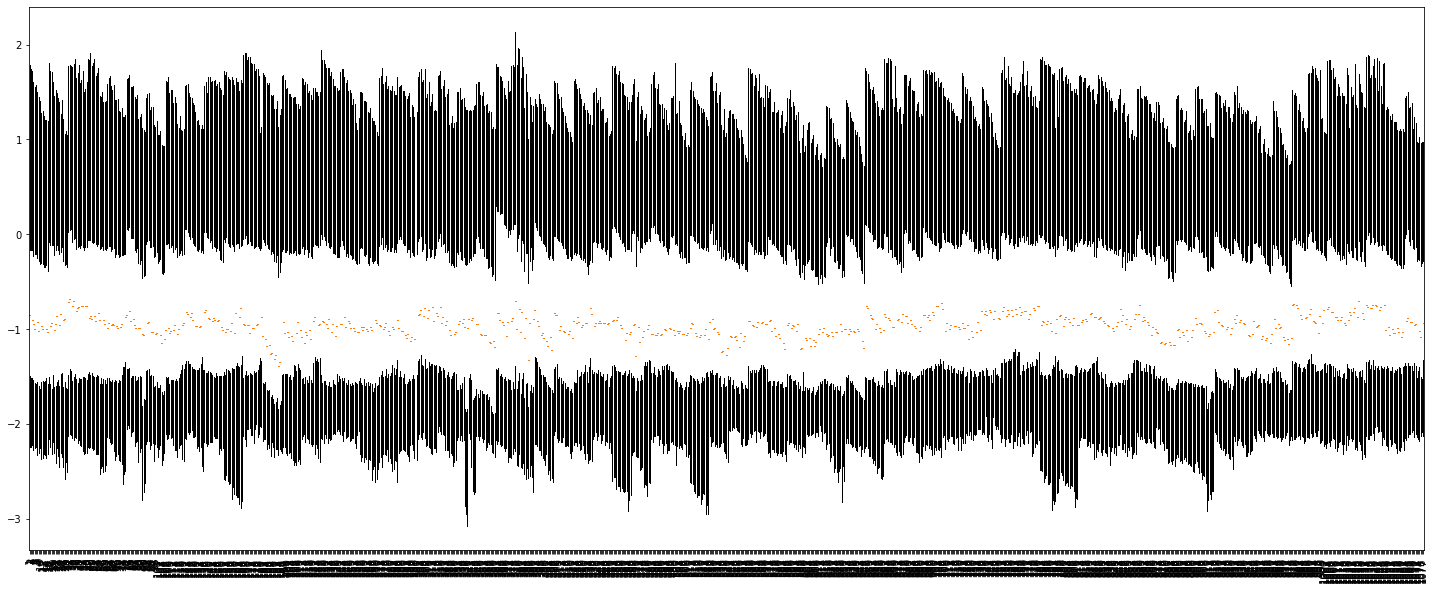

In [75]:
plt.figure(figsize=(25, 10))
plt.boxplot(matrix_log.T, showcaps=False, meanline=False, showbox=False, showfliers=False)
plt.xticks(rotation=90)
plt.show()

In [76]:
matrix_log.shape

(1077, 71)

## Our data is cleaned 

- Number of proteins = 71 (from 77)
- Number of samples = 1077 (from 1080)

**Log transformed the data**

# Mice Protein Expression Dataset
The data set includes the expression levels of 77 proteins/protein changes that generated
measurable signals in the cortex's nuclear fraction. There are 72 mice in all, with 38
control mice and 34 trisomic mice (Down syndrome). In the experiments, 15
measurements of each protein per sample/mouse were recorded. As a result, there are
**38x15**, or 570 measurements for control mice and **34x15**, or 510 measurements for
trisomic mice. There are 1080 measurements per protein in the dataset. Each
measurement can be thought of as a separate sample/mouse.

## Correlation Plot

We can see correlation in the data

<AxesSubplot:>

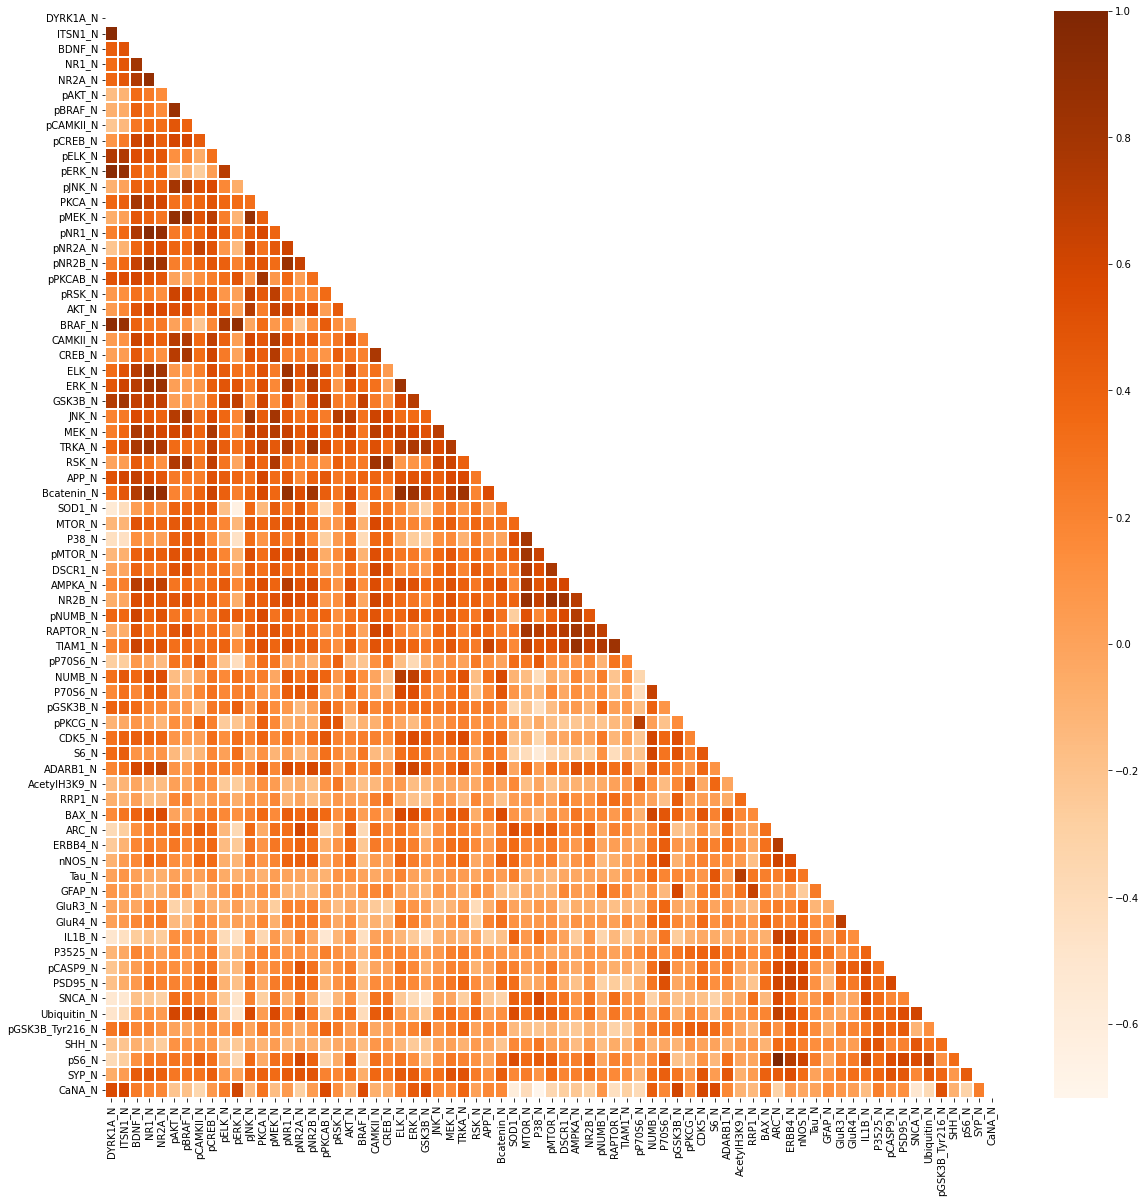

In [79]:
mask = np.triu(matrix_log.corr())
plt.figure(figsize=(20,20))
sns.heatmap(matrix_log.corr(), linewidths=0.2, mask=mask, cmap="Oranges")

## Collinearity in the data

We want to remove multiple collinearity from the data

Two proteins having the same outcome will cause biasness in our model

## Missing Values

Missing values in columns

In [ ]:
p = (df.columns, df.isnull().sum(axis=0))
# list(filter(lambda x: x[1]>0 ,list(zip(*p))))
pd.DataFrame(p).T

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV
df_dropna = df.copy()
df_dropna.set_index(["MouseID", "Genotype"], inplace=True, drop=True)

df_dropna = df_dropna.dropna(how = "all")
df_dropna = df_dropna.dropna(thresh=72)

print(df_dropna.shape)
df_dropna.head()


In [ ]:
df_dropna.isna().sum()

In [ ]:
missing_columns = df_dropna.columns[df_dropna.isna().sum() != 0]
missing_columns

## Imputation

Using LinearRegression model to impute the missing data

We create a subset of missing data and use the non missing columns to predict their values with the help of a regression model, the scores of the predictions as we can see are pretty good (>0.8)

In [ ]:
# creating subset of missing data and applying regression imoutation
deter_data = pd.DataFrame(columns = ["Det_" + name for name in missing_columns])

for feature in missing_columns:
    deter_data.loc[:, "Det_" + feature] = df_dropna.loc[:, feature]
    parameters = list(set(df_dropna.columns) - set(missing_columns) - {feature})
    
    #Create a Linear Regression model to estimate the missing data
    model = LinearRegression()
    dfIntermin = pd.concat([df_dropna[parameters], df_dropna[feature]], axis=1).dropna()
    
    X_train, X_test, y_train, y_test = train_test_split(dfIntermin.loc[:, parameters], dfIntermin.loc[:, feature],
                                                        test_size=0.2, random_state=42)
    
    model.fit(X = X_train, y = y_train)
    print(model.score(X_test, y_test))
    
    #observe that I preserve the index of the missing data from the original dataframe
    deter_data.loc[df_dropna[feature].isnull(), "Det_" + feature] = model.predict(df_dropna[parameters])[df_dropna[feature].isnull()]
    


In [ ]:
# creating subset of missing data and applying regression imoutation
deter_data = pd.DataFrame(columns = [name for name in missing_columns])

for feature in missing_columns:
    deter_data.loc[:, feature] = df_dropna.loc[:, feature]
    parameters = list(set(df_dropna.columns) - set(missing_columns) - {feature})
    
    #Create a Linear Regression model to estimate the missing data
    model = LinearRegression()
    dfIntermin = pd.concat([df_dropna[parameters], df_dropna[feature]], axis=1).dropna()
    
    X_train, X_test, y_train, y_test = train_test_split(dfIntermin.loc[:, parameters], dfIntermin.loc[:, feature],
                                                        test_size=0.2, random_state=42)
    
    model.fit(X = X_train, y = y_train)
    print(model.score(X_test, y_test))
    
    #observe that I preserve the index of the missing data from the original dataframe
    deter_data.loc[df_dropna[feature].isnull(), feature] = model.predict(df_dropna[parameters])[df_dropna[feature].isnull()]
    
deter_data

In [ ]:
df_filled = df_dropna.fillna(deter_data)
df_filled.isna().sum()

In [ ]:
df_filled.shape

## EDA

I would like to see if the proteins are clustering 

The number of clusters would give me an idea if we can use the protein levels to predict something

For clustering the go to choice is PCA, if I find the PCA to be in proper shape, I can try to implement (O)PLS-DA to find out the most discriminating proteins between the control and treated conditions

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
df_filled.head()

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filled)
df_scaled


In [ ]:
pca = PCA(.95)
pca.fit(df_scaled)

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.figure(figsize=(12, 8))
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
pca.explained_variance_ratio_[0:10].sum()

In [ ]:
pca = PCA(2)
projected = pca.fit_transform(df_scaled)
print(df_scaled.shape)
print(projected.shape)

In [ ]:
colorDict = {label:idx for idx,label in enumerate(mice)}
colorkey = [colorDict[i] for i in list(map(lambda x: x[0].split("_")[0], df_filled.index))]

In [ ]:
# colorkey = list(map(lambda x: int(x[0].split("_")[0]), df_filled.index))

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(projected[:, 0], projected[:, 1],
            edgecolor='none', alpha=1, c = colorkey)
plt.xlabel('component 1')
plt.ylabel('component 2')

